In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_posts = "/content/drive/MyDrive/ColabNotebooks/all_posts_hanni.csv"
file_comments = "/content/drive/MyDrive/ColabNotebooks/all_comments_hanni.csv"

try:
     # Đọc file posts
    posts = pd.read_csv(file_posts)
    print(f"Các cột trong file '{file_posts}' là:")
    print(posts.columns.tolist())
    print("-" * 30)

    # Đọc file comments
    comments = pd.read_csv(file_comments)
    print(f"Các cột trong file '{file_comments}' là:")
    print(comments.columns.tolist())

except FileNotFoundError:
    print("Lỗi: Không tìm thấy file. Vui lòng kiểm tra lại tên file và đường dẫn.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

Các cột trong file '/content/drive/MyDrive/ColabNotebooks/all_posts_hanni.csv' là:
['archived', 'allow_live_comments', 'author', 'contest_mode', 'created_utc', 'downs', 'domain', 'hide_score', 'gilded', 'id', 'is_created_from_ads_ui', 'is_crosspostable', 'is_meta', 'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video', 'is_original_content', 'no_follow', 'name', 'num_comments', 'num_crossposts', 'media_only', 'over_18', 'permalink', 'pinned', 'quarantine', 'retrieved_on', 'selftext', 'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed', 'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title', 'total_awards_received', 'ups', 'score', 'upvote_ratio', 'url', 'removed_by_category']
------------------------------
Các cột trong file '/content/drive/MyDrive/ColabNotebooks/all_comments_hanni.csv' là:
['archived', 'author', 'body', 'created_utc', 'downs', 'gilded', 'id', 'is_submitter', 'link_id', 'locked', 'name', 'no_follow', 'p

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style cho đẹp
sns.set(style="whitegrid")

# Đọc dữ liệu
posts = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/all_posts_hanni.csv')
comments = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/all_comments_hanni.csv')

print("Posts:", posts.shape)
print("Comments:", comments.shape)



Posts: (134121, 45)
Comments: (1300190, 25)


In [ ]:
print(posts.info())
print(comments.info())

print(posts.head(3))
print(comments.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134121 entries, 0 to 134120
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   archived                 134121 non-null  bool   
 1   allow_live_comments      134121 non-null  bool   
 2   author                   134121 non-null  object 
 3   contest_mode             134121 non-null  bool   
 4   created_utc              134121 non-null  int64  
 5   downs                    134121 non-null  int64  
 6   domain                   131238 non-null  object 
 7   hide_score               134121 non-null  bool   
 8   gilded                   134121 non-null  int64  
 9   id                       134121 non-null  object 
 10  is_created_from_ads_ui   134121 non-null  bool   
 11  is_crosspostable         134121 non-null  bool   
 12  is_meta                  134121 non-null  bool   
 13  is_reddit_media_domain   134121 non-null  bool   
 14  is_r

In [ ]:
#xử lí thời gian (Cột created_utc là timestamp → convert sang datetime.)
posts['created_utc'] = pd.to_datetime(posts['created_utc'], unit='s', errors='coerce')
comments['created_utc'] = pd.to_datetime(comments['created_utc'], unit='s', errors='coerce')


/tmp/ipython-input-942702371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=post_counts.index, x=post_counts.values, palette="viridis")


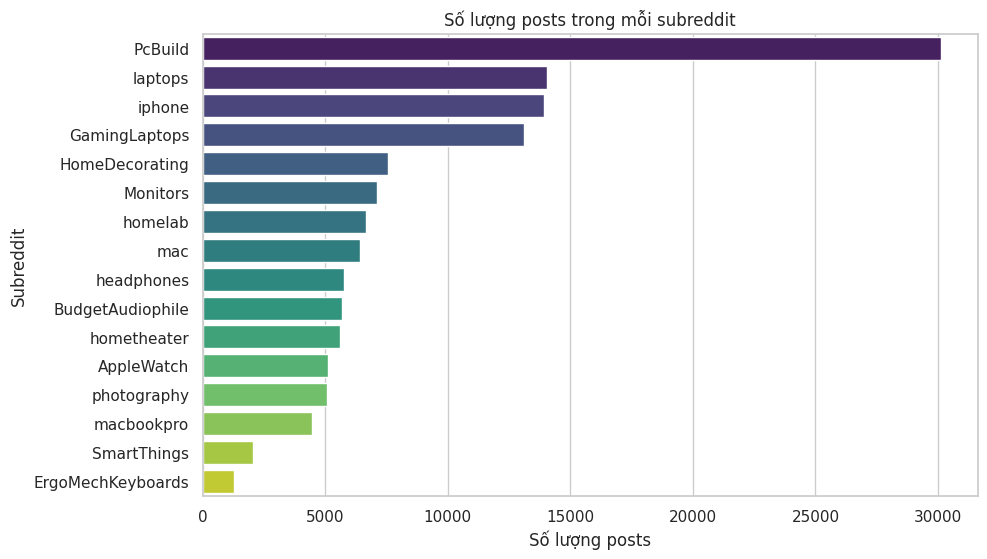

/tmp/ipython-input-942702371.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=comment_counts.index, x=comment_counts.values, palette="magma")


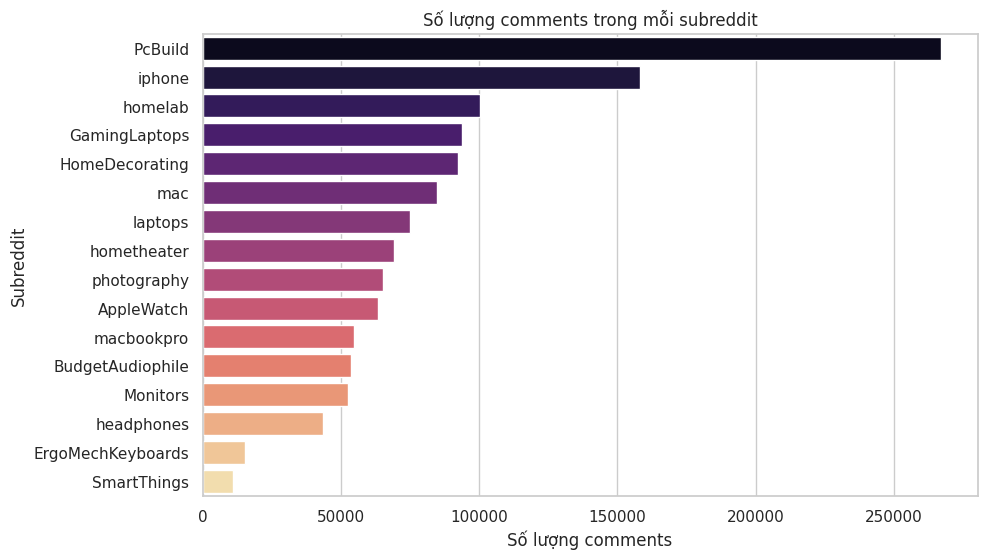

In [ ]:
#Thống kê cơ bản cho từng subreddit (Bao nhiêu post, bao nhiêu comment mỗi subreddit)
# Số lượng posts theo subreddit
post_counts = posts['subreddit'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(y=post_counts.index, x=post_counts.values, palette="viridis")
plt.title("Số lượng posts trong mỗi subreddit")
plt.xlabel("Số lượng posts")
plt.ylabel("Subreddit")
plt.show()

# Số lượng comments theo subreddit
comment_counts = comments['subreddit'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(y=comment_counts.index, x=comment_counts.values, palette="magma")
plt.title("Số lượng comments trong mỗi subreddit")
plt.xlabel("Số lượng comments")
plt.ylabel("Subreddit")
plt.show()


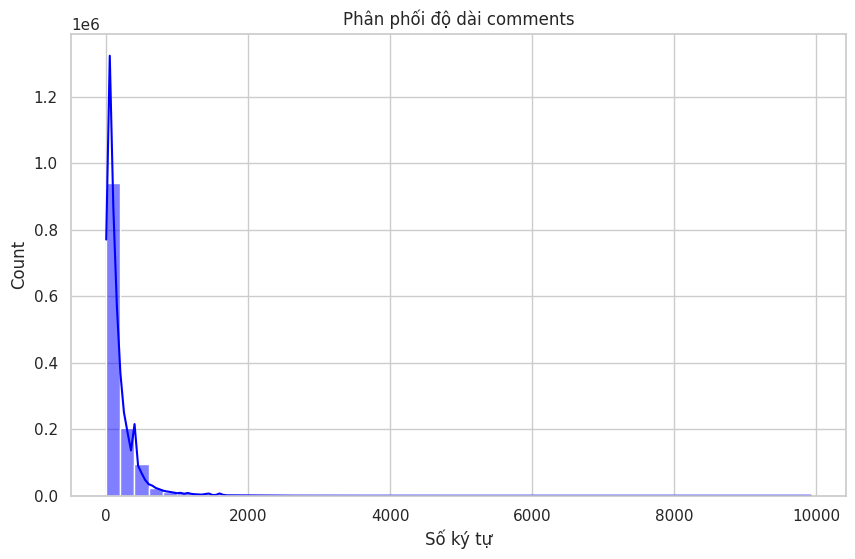

/tmp/ipython-input-2886155457.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_comment_len.index, x=avg_comment_len.values, palette="coolwarm")


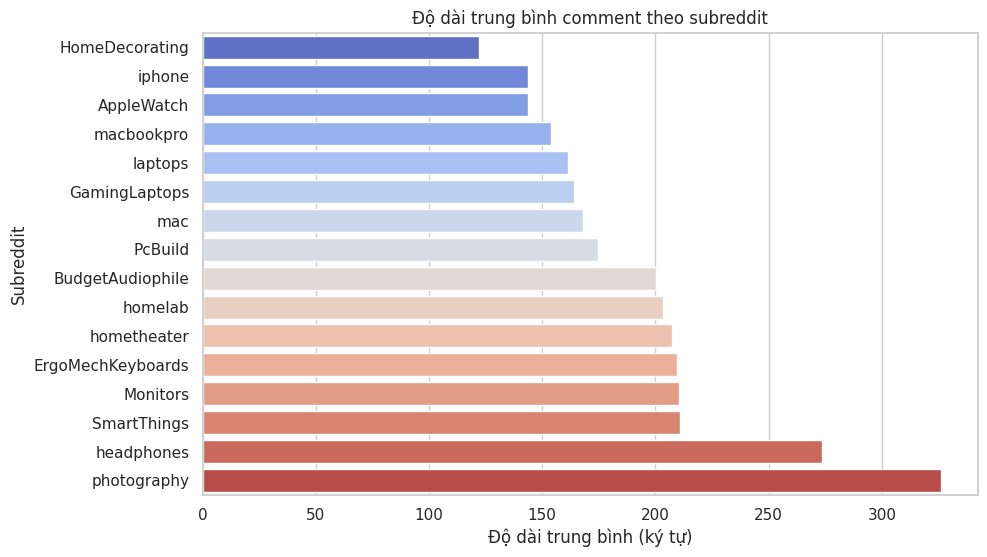

In [ ]:
#PHÂN TÍCH NỘI DUNG CƠ BẢN
# Độ dài text
posts['title_length'] = posts['title'].astype(str).apply(len)
posts['selftext_length'] = posts['selftext'].astype(str).apply(len)
comments['body_length'] = comments['body'].astype(str).apply(len)

# Histogram độ dài comment
plt.figure(figsize=(10,6))
sns.histplot(comments['body_length'], bins=50, kde=True, color='blue')
plt.title("Phân phối độ dài comments")
plt.xlabel("Số ký tự")
plt.show()

# Trung bình độ dài comment mỗi subreddit
avg_comment_len = comments.groupby('subreddit')['body_length'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(y=avg_comment_len.index, x=avg_comment_len.values, palette="coolwarm")
plt.title("Độ dài trung bình comment theo subreddit")
plt.xlabel("Độ dài trung bình (ký tự)")
plt.ylabel("Subreddit")
plt.show()


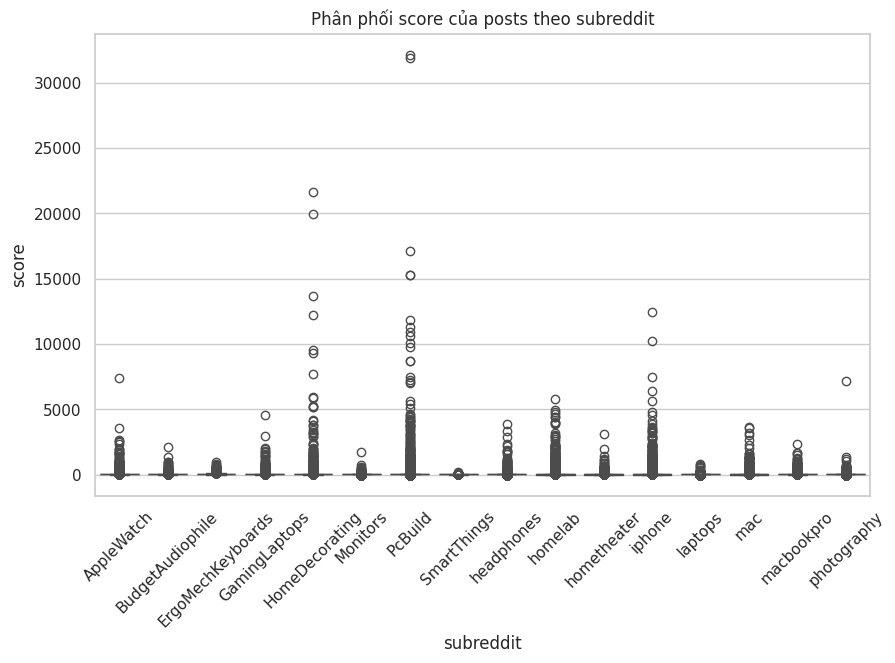

/tmp/ipython-input-2853119002.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_comment_score.index, x=avg_comment_score.values, palette="cubehelix")


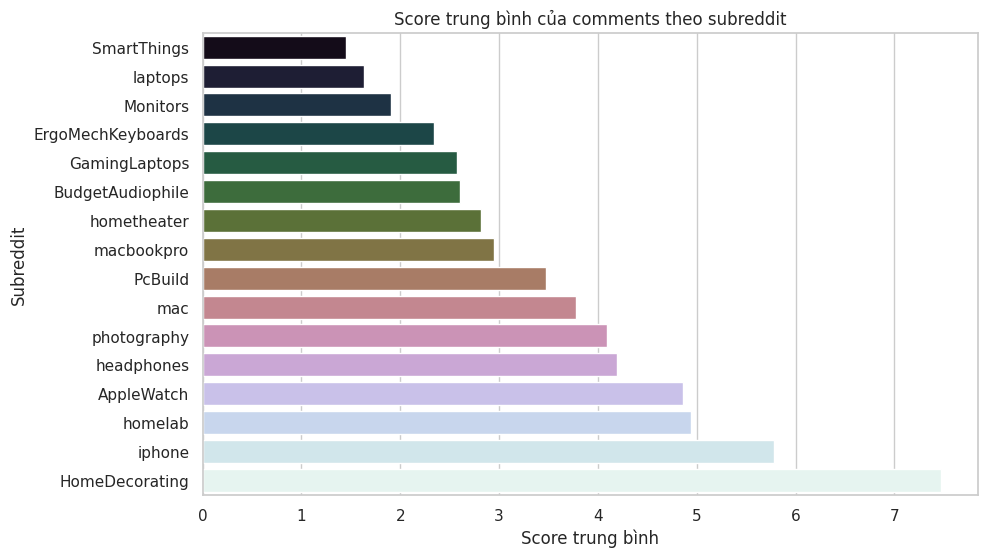

In [ ]:
#SCORE , UPVOTE ( THỂ HIỆN SỰ QUAN TÂM ĐẾN POST/COMMENT)

# Phân phối score của posts
plt.figure(figsize=(10,6))
sns.boxplot(x='subreddit', y='score', data=posts)
plt.xticks(rotation=45)
plt.title("Phân phối score của posts theo subreddit")
plt.show()

# Trung bình score của comments theo subreddit
avg_comment_score = comments.groupby('subreddit')['score'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(y=avg_comment_score.index, x=avg_comment_score.values, palette="cubehelix")
plt.title("Score trung bình của comments theo subreddit")
plt.xlabel("Score trung bình")
plt.ylabel("Subreddit")
plt.show()


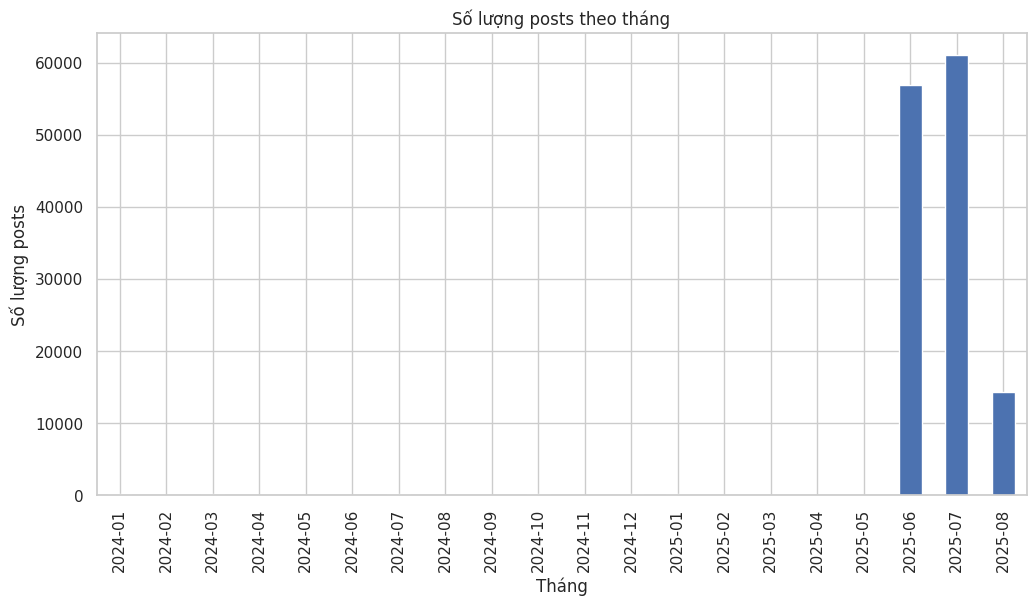

/tmp/ipython-input-3940358495.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=comments, palette="plasma")


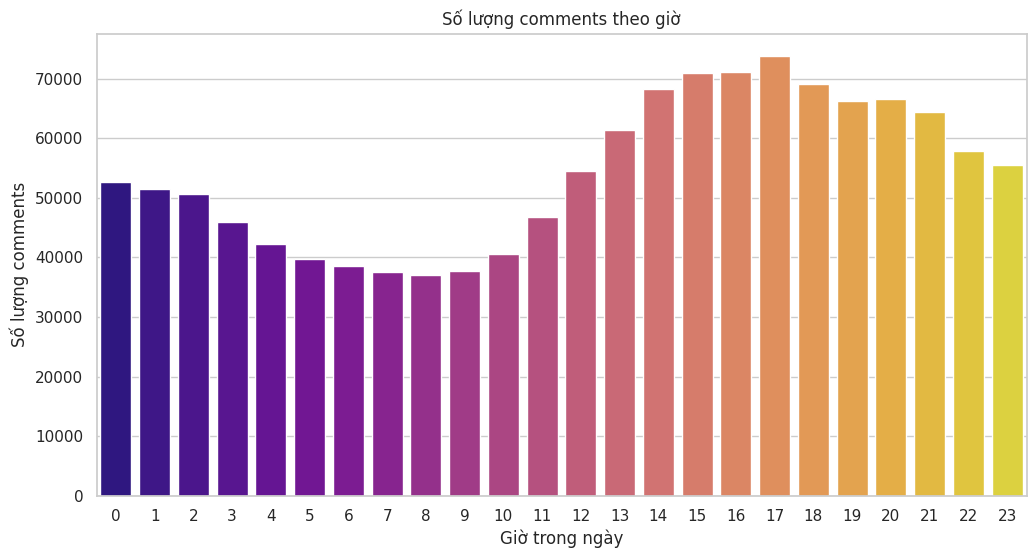

In [ ]:
#KHI NÀO POST/COMMENT NHIỀU NHẤT
# Posts theo tháng
posts['month'] = posts['created_utc'].dt.to_period('M')
post_monthly = posts.groupby('month').size()

plt.figure(figsize=(12,6))
post_monthly.plot(kind='bar')
plt.title("Số lượng posts theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Số lượng posts")
plt.show()

# Comments theo giờ
comments['hour'] = comments['created_utc'].dt.hour
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=comments, palette="plasma")
plt.title("Số lượng comments theo giờ")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Số lượng comments")
plt.show()


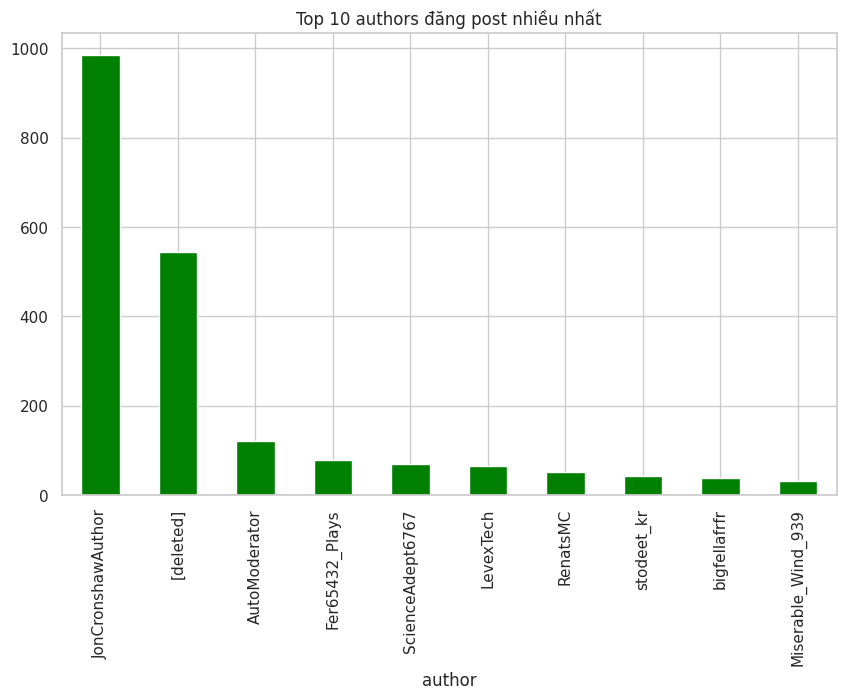

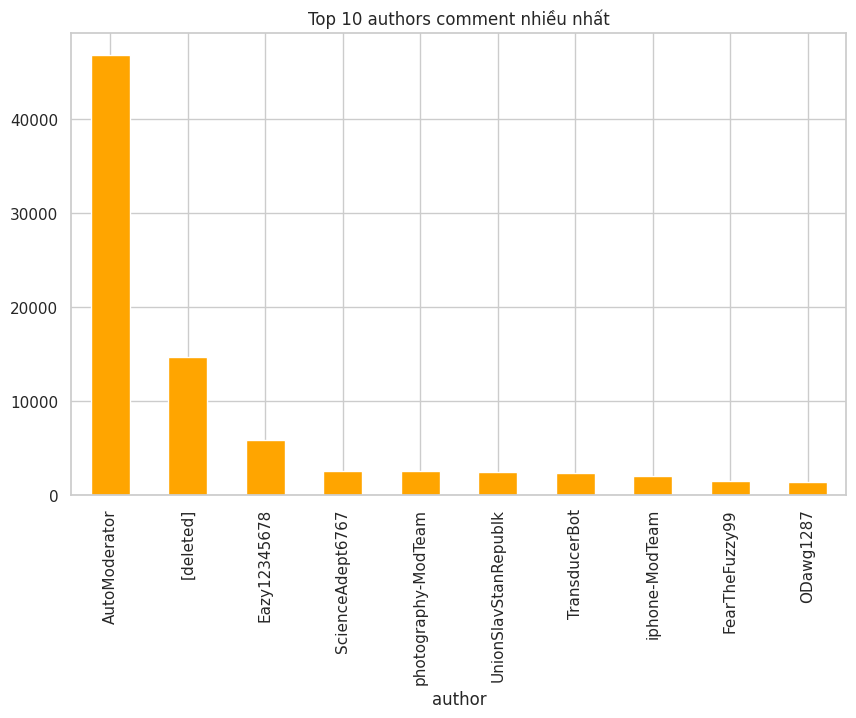

In [ ]:
# TOP AUTHORS ( AI LÀ NGƯỜI HOẠT ĐỘNG TÍCH CỰC NHẤT )
# Top 10 authors post
plt.figure(figsize=(10,6))
posts['author'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 authors đăng post nhiều nhất")
plt.show()

# Top 10 authors comment
plt.figure(figsize=(10,6))
comments['author'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 authors comment nhiều nhất")
plt.show()


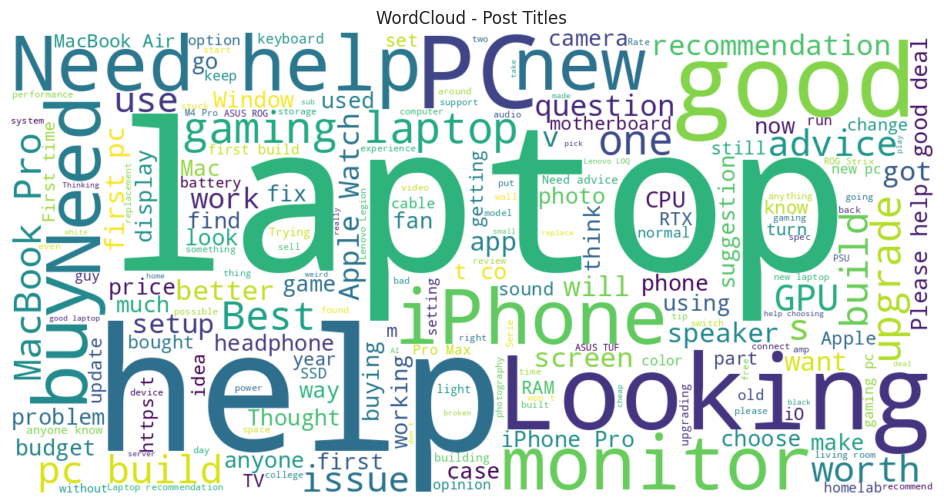

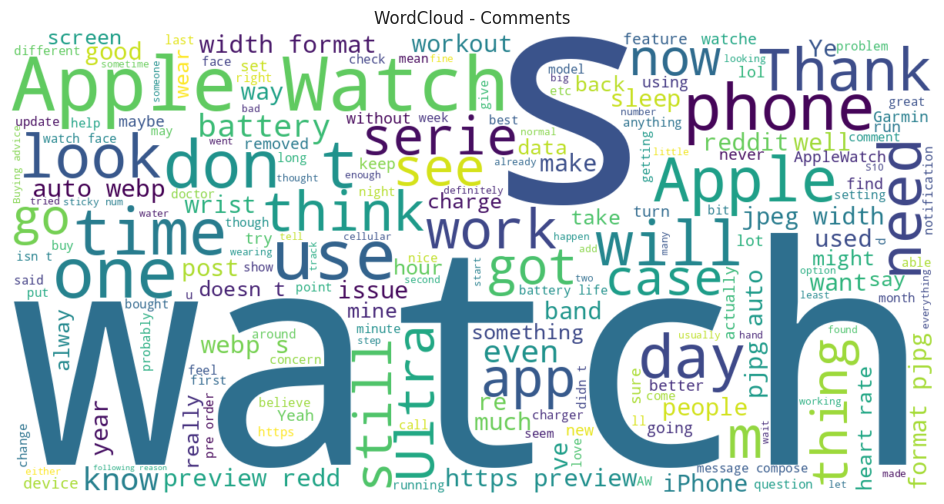

In [ ]:
#WORDCLOUD (XEM CÁC TỪ KHÓA XUẤT HIỆN NHIỀU NHẤT)
from wordcloud import WordCloud, STOPWORDS

# WordCloud cho titles
text = " ".join(posts['title'].dropna().astype(str).tolist())
wc = WordCloud(stopwords=STOPWORDS, background_color="white", width=1200, height=600).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Post Titles")
plt.show()

# WordCloud cho comments
text = " ".join(comments['body'].dropna().astype(str).tolist()[:50000]) # sample cho nhẹ
wc = WordCloud(stopwords=STOPWORDS, background_color="white", width=1200, height=600).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Comments")
plt.show()
